In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pork = pd.read_csv('E:/datas/pork.csv')
pork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58179 entries, 0 to 58178
Data columns (total 4 columns):
publish_date    58179 non-null object
province        58179 non-null object
city            58170 non-null object
price           58179 non-null object
dtypes: object(4)
memory usage: 1.8+ MB


In [3]:
pork.head(2).append(pork.tail(3))

,publish_date,province,city,price
0,2019-11-15 08:40:06,河南省,梁园区,55.00
1,2019-11-15 08:40:06,山西省,绛县,52.00
58176,2018-12-01 08:35:17,黑龙江,海伦市,16.00
58177,2018-12-01 08:35:17,湖北省,大冶市,16.00
58178,2018-12-01 08:35:17,湖北省,浠水县,26.00


### 数据清洗

#### 1.空值处理

In [4]:
# city有9个空值，我们将这9列直接删除
pork.dropna(axis=0,how='any',inplace=True)

In [5]:
pork.shape

(58170, 4)

#### 2.字段属性转化

In [6]:
# 1.将publish_date转化为datetime格式
# pork['publish_date'] = pd.to_datetime(pork['publish_date'],format='%Y-%m-%d %H:%M:%S')
# 时间格式不统一，所以没办法用to_datetime一次转换
# 看看存在什么特殊格式
from datetime import datetime
from dateutil.parser import parse
def switch_time(x):
    x = x.split(' ')
    if len(x) == 2:
        return False
    else:
        return True
# 有几个特殊格式
pork['publish_date'].apply(switch_time).sum()

9

In [7]:
# 特殊格式什么样
pork['publish_date'][pork['publish_date'].apply(switch_time)]

8181     publish_date
16363    publish_date
24545    publish_date
25227    publish_date
26882    publish_date
28537    publish_date
30192    publish_date
38967    publish_date
47742    publish_date
Name: publish_date, dtype: object

In [8]:
# 将这几个特殊格式剔除
pork = pork.query("publish_date!='publish_date'")
pork.shape

(58161, 4)

In [9]:
# 再次转换试试
def switch_time(x):
    x = x.split(' ')
    x = datetime.strptime(x[0],'%Y-%m-%d')
    return x
pork['publish_date'] = pork['publish_date'].apply(switch_time)

In [10]:
# 将价格转化为float
def switch_price(x):
    return float(x)
pork['price'] = pork['price'].apply(switch_price)

In [11]:
# 看看省份是否统一
pork['province'].unique()

array(['河南省', '山西省', '河北省', '湖北省', '甘肃省', '天津市', '云南省', '黑龙江', '山东省',
       '贵州省', '福建省', '重庆市', '吉林省', '新疆', '湖南省', '四川省', '辽宁省', '江西省',
       '江苏省', '陕西省', '黑龙江省', '北京市', '广东省', '安徽省', '内蒙古', '浙江省', '广西',
       '宁夏', '青海省', '海南省', '上海市', '甘肃省\xa0', '广东省\xa0', '河北省\xa0',
       '河南省\xa0', '黑龙江\xa0', '山西省\xa0', '山东省\xa0', '吉林省\xa0', '新疆\xa0',
       '湖南省\xa0', '湖北省\xa0', '云南省\xa0', '四川省\xa0', '江苏省\xa0', '福建省\xa0',
       '辽宁省\xa0', '浙江省\xa0', '重庆市\xa0', '陕西省\xa0', '天津市\xa0', '内蒙古\xa0',
       '安徽省\xa0', '广西\xa0', '江西省\xa0', '宁夏\xa0', '贵州省\xa0', '黑龙江省\xa0',
       '北京市\xa0', '海南省\xa0', '广西壮族自治区\xa0'], dtype=object)

In [12]:
# 将省份格式统一
def switch_province(x):
    return x.strip('\xa0')
pork['province'] = pork['province'].apply(switch_province)

In [13]:
pork['province'].unique()

array(['河南省', '山西省', '河北省', '湖北省', '甘肃省', '天津市', '云南省', '黑龙江', '山东省',
       '贵州省', '福建省', '重庆市', '吉林省', '新疆', '湖南省', '四川省', '辽宁省', '江西省',
       '江苏省', '陕西省', '黑龙江省', '北京市', '广东省', '安徽省', '内蒙古', '浙江省', '广西',
       '宁夏', '青海省', '海南省', '上海市', '广西壮族自治区'], dtype=object)

In [14]:
# 广西和广西壮族自治区重复,黑龙江省和黑龙江重复
def switch_province2(x):
    if x == '广西壮族自治区':
        x = '广西'
    return x
def switch_province3(x):
    if x == '黑龙江':
        x = '黑龙江省'
    return x
pork['province'] = pork['province'].apply(switch_province2)
pork['province'] = pork['province'].apply(switch_province3)

In [15]:
# 看看城市有什么特殊格式
pork['city'].unique()

array(['梁园区', '绛县', '南乐县', ..., '古浪县\xa0', '上蔡县\xa0', '淮阳县\xa0'],
      dtype=object)

In [16]:
# 将城市格式统一
def switch_city(x):
    return x.strip('\xa0')
pork['city'] = pork['city'].apply(switch_city)

### 数据探索

In [17]:
# 新增year
pork['year'] = pork['publish_date'].apply(lambda x:x.year)
pork['year'][:3]

0    2019
1    2019
2    2019
Name: year, dtype: int64

In [18]:
# 调大时间颗粒度，新增月份
pork['month'] = pork['publish_date'].values.astype('datetime64[M]')
pork['month'][:5]

0   2019-11-01
1   2019-11-01
2   2019-11-01
3   2019-11-01
4   2019-11-01
Name: month, dtype: datetime64[ns]

In [19]:
pork.query('year==2018').shape

(30, 6)

In [20]:
# 2018年只有30条数据，这里先删除不做分析
pork = pork.query('year==2019')

In [21]:
# 看看2019年总共有多少月的数据
pork['month'].unique()

array(['2019-11-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

#### 1.看看整年全国猪肉价格走势

In [22]:
year_price_table = pork.pivot_table(index='month',values='price',aggfunc='mean')
year_price_table

,price
month,
2019-01-01,16.048649
2019-03-01,20.410526
2019-04-01,20.873913
2019-05-01,21.512488
2019-06-01,22.472946
2019-07-01,24.686880
2019-08-01,30.639434
2019-09-01,35.097863
2019-10-01,43.573434


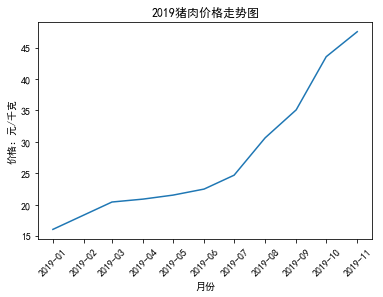

In [23]:
plt.rcParams['font.family'] = 'SimHei'
plt.plot(year_price_table)
plt.xticks(rotation=45)
plt.xlabel('月份')
plt.ylabel('价格：元/千克')
plt.title('2019猪肉价格走势图')
plt.savefig('2019猪肉价格走势图.jpg')

#### 2.看看十一月份猪肉价格走势

In [24]:
price_month_11 = pork.query("month==Timestamp('2019-11-01 00:00:00')").pivot_table(index='publish_date',values='price',aggfunc='mean')
#price_month_11

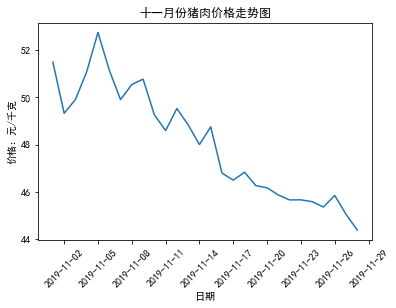

In [25]:
plt.plot(price_month_11)
plt.xticks(rotation=45)
plt.xlabel('日期')
plt.ylabel('价格：元/千克')
plt.title('十一月份猪肉价格走势图')
plt.savefig('十一月份猪肉价格走势图.jpg')

#### 3.看看哪些城市猪肉最贵

In [26]:
top_10 = pork.query("publish_date==Timestamp('2019-11-28 00:00:00')").groupby(['province','city']).price.mean().sort_values(ascending=False)[:10]
top_10

province  city
新疆        巩留县     60.0
山西省       壶关县     56.0
河南省       平舆县     56.0
四川省       东坡区     54.0
山西省       长治县     52.0
河北省       新乐市     52.0
湖南省       溆浦县     52.0
山东省       冠县      50.0
河南省       卧龙区     50.0
          柘城县     50.0
Name: price, dtype: float64

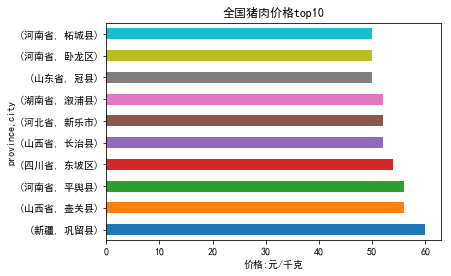

In [27]:
top_10.plot.barh()
plt.xlabel('价格:元/千克')
plt.title('全国猪肉价格top10')
plt.savefig('全国猪肉价格top10.jpg')

#### 4.看看哪些城市猪肉最便宜

In [28]:
tail_10 =  pork.query("publish_date==Timestamp('2019-11-28 00:00:00')").groupby(['province','city']).price.mean().sort_values(ascending=True)[:10]
tail_10

province  city
河南省       潢川县     31.0
山东省       嘉祥县     33.0
天津市       宁河区     33.6
湖北省       大冶市     34.0
内蒙古       敖汉旗区    35.8
云南省       祥云县     38.0
吉林省       长岭县     38.0
山东省       高青县     39.0
          郓城县     39.0
河南省       南乐县     39.0
Name: price, dtype: float64

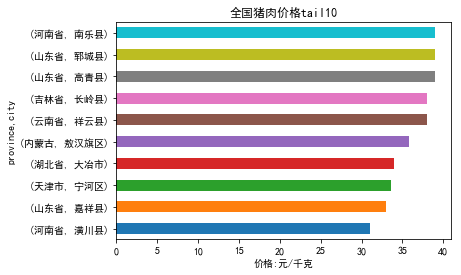

In [29]:
tail_10.plot.barh()
plt.xlabel('价格:元/千克')
plt.title('全国猪肉价格tail10')
plt.savefig('全国猪肉价格tail10.jpg')

#### 5.看看各省十一月份猪肉均价

In [30]:
province_table = pork.query("month==Timestamp('2019-11-01 00:00:00')").pivot_table(index='province',values='price',aggfunc='mean').sort_values('price',ascending=False)
#province_table

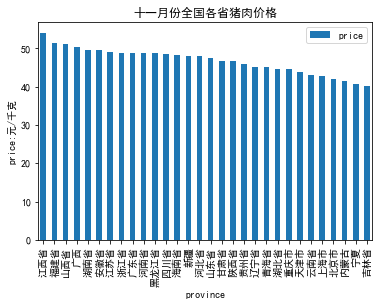

In [31]:
province_table.plot.bar()
plt.ylabel('price:元/千克')
plt.title('十一月份全国各省猪肉价格')
plt.savefig('十一月份全国各省猪肉价格.jpg')

In [32]:
# 将省份名字统一
# 将价格保留2位小数
province_list = [i.strip('省').strip('市') for i in list(province_table.index)]
price_list = [round(i,2) for i in list(province_table.price)]
#list(zip(province_list,price_list))

In [33]:
from pyecharts import options as opts
from pyecharts.charts import Map
map = Map()
map.add("", list(zip(province_list,price_list)), "china")
map.set_global_opts(
            title_opts=opts.TitleOpts(title="十一月份全国猪肉价格分布图"),
            visualmap_opts=opts.VisualMapOpts(max_=55,min_=40,is_piecewise=True),
            toolbox_opts=opts.ToolboxOpts(is_show=True)
        )
map.render_notebook()

#### 6.看看全年各省猪肉价格走势

In [34]:
month_province_price = pork.pivot_table(index='province',columns='month',values='price',aggfunc='mean')
#month_province_price

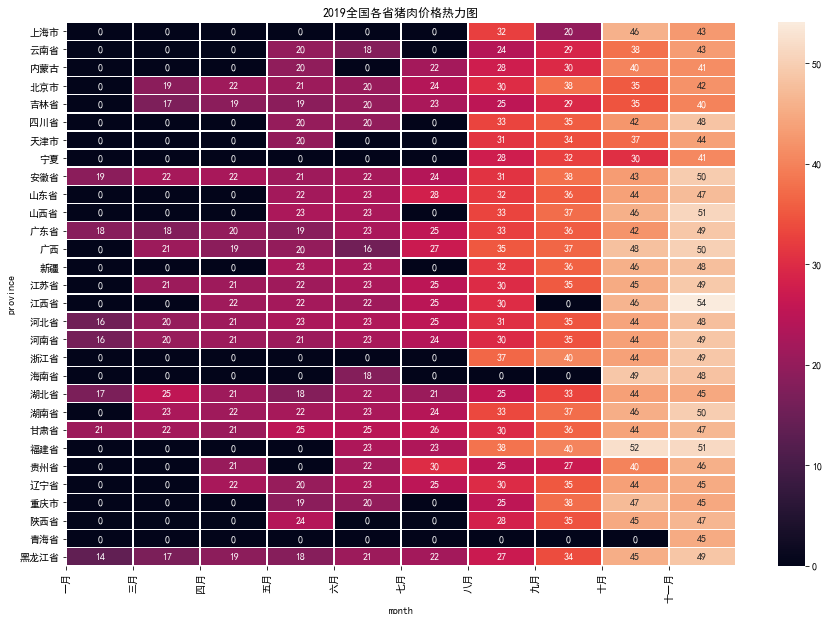

In [35]:
month_province_price = month_province_price.fillna(0)
plt.figure(figsize=(15,10))
sns.heatmap(month_province_price,annot=True,linewidths=.5)
plt.xticks(range(10),['一月','三月','四月','五月','六月','七月','八月','九月','十月','十一月'])
plt.title('2019全国各省猪肉价格热力图')
plt.savefig('2019全国各省猪肉价格热力图.jpg')

### 中国人到底有多爱吃猪肉

In [36]:
# 读入全球猪肉产量数据
pork_yield = pd.read_csv('E:/datas/pork_yield.csv')
pork_yield.head()

,rank,country,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,1,中国,"54,040","54,518","54,255","56,454","58,208","56,183","54,435","51,316","51,384"
1,2,美利坚合众国,"11,943","11,611","11,320","11,121","10,368","10,525","10,554","10,331","10,186"
2,3,巴西,"3,763","3,725","3,700","3,519","3,400","3,335","3,330","3,227","3,195"
3,4,俄罗斯联邦,"3,155","2,959","2,820","2,589","2,484","2,394","2,179","2,069","1,987"
4,5,越南,"2,811","2,741","2,701","2,548","2,431","2,357","2,307","2,262","2,217"


In [38]:
# 将产量转化为int类型
for i in range(2010,2019):
    pork_yield[str(i)] = pork_yield[str(i)].str.replace(',','').astype('int64')

#### 1.看看全世界2018年猪肉产量

In [39]:
pork_yield_2018 = pork_yield[['country','2018']].sort_values('2018')
pork_yield_2018

,country,2018
9,日本,1284
8,墨西哥,1321
7,大韩民国,1329
6,菲律宾,1601
5,加拿大,1955
4,越南,2811
3,俄罗斯联邦,3155
2,巴西,3763
1,美利坚合众国,11943
0,中国,54040


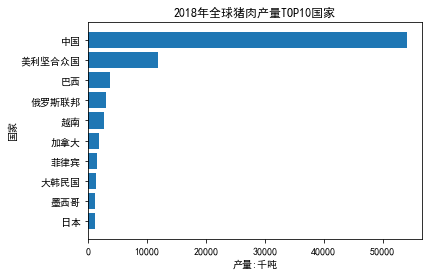

In [40]:
plt.barh(range(len(pork_yield_2018)),pork_yield_2018['2018'])
plt.yticks(range(len(pork_yield_2018)),pork_yield_2018['country'].tolist())
plt.xlabel('产量:千吨')
plt.ylabel('国家')
plt.title('2018年全球猪肉产量TOP10国家')
plt.savefig('2018年全球猪肉产量TOP10国家.jpg')

#### 2.中国近年来猪肉产量

In [41]:
# 中国近年来猪肉产量
c = pork_yield.iloc[0][2:].sort_index()
c

2010    51384
2011    51316
2012    54435
2013    56183
2014    58208
2015    56454
2016    54255
2017    54518
2018    54040
Name: 0, dtype: object

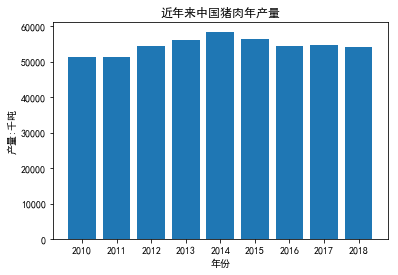

In [42]:
plt.bar(c.index,c.values)
plt.xlabel('年份')
plt.ylabel('产量:千吨')
plt.title('近年来中国猪肉年产量')
plt.savefig('近年来中国猪肉年产量.jpg')

- 近年来中国猪肉产量在50000千吨，也就是5000万吨之上
- 按照平均每头猪产70kg猪肉来算，整整7亿头猪
- 中国14亿人口，每两个人就有一头猪
- 中央投放的1万吨猪肉也就勉强够中国人吃一顿午饭

In [43]:
# 这仅仅是国内猪肉产量，中国每年还向国外进口大量猪肉

#### 3.中国近年来猪肉进出口量

In [44]:
# 读入今年来中国猪肉进口数据
pork_import = pd.read_csv('E:/datas/pork_import.csv')
pork_import.head()

,rank,country,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,1,中国,"1,561","1,620","2,181","1,029",761,770,730,758,415
1,2,日本,"1,481","1,475","1,361","1,270","1,332","1,223","1,259","1,254","1,198"
2,3,墨西哥,"1,188","1,083","1,021",981,818,783,706,594,687
3,4,大韩民国,753,645,615,599,480,388,502,640,382
4,5,美利坚合众国,473,506,495,506,459,399,364,364,390


In [45]:
# 同样将数值转化为int类型
for i in range(2010,2019):
    pork_import[str(i)] = pork_import[str(i)].str.replace(',','').astype('int64')

In [46]:
# 猪肉出口
pork_export = pd.read_csv('E:/datas/pork_export.csv')
pork_export.head()

,rank,country,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,1,美利坚合众国,"2,665","2,555","2,376","2,272","2,310","2,262","2,440","2,357","1,915"
1,2,加拿大,"1,331","1,351","1,329","1,239","1,220","1,246","1,243","1,197","1,159"
2,3,巴西,730,786,832,627,556,585,660,583,618
3,4,中国,203,208,191,231,277,244,235,244,278
4,5,智利,200,171,173,178,163,164,180,139,130


In [47]:
for i in range(2010,2019):
    pork_export[str(i)] = pork_export[str(i)].str.replace(',','').astype('int64')

In [48]:
# 2018世界猪肉进口top10
pork_import_2018 = pork_import[['country','2018']].sort_values('2018')
pork_import_2018

,country,2018
9,哥伦比亚,129
8,澳大利亚,216
7,加拿大,233
6,菲律宾,286
5,香港,423
4,美利坚合众国,473
3,大韩民国,753
2,墨西哥,1188
1,日本,1481
0,中国,1561


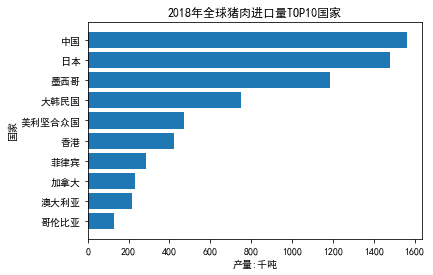

In [49]:
plt.barh(range(len(pork_import_2018)),pork_import_2018['2018'])
plt.yticks(range(len(pork_import_2018)),pork_import_2018['country'].tolist())
plt.xlabel('产量:千吨')
plt.ylabel('国家')
plt.title('2018年全球猪肉进口量TOP10国家')
plt.savefig('2018年全球猪肉进口量TOP10国家.jpg')

In [50]:
# 2010-2018中国猪肉进出口量对比
im_10_18 = pork_import.iloc[0][2:].sort_index()
ex_10_18 = pork_export.iloc[3][2:].sort_index()

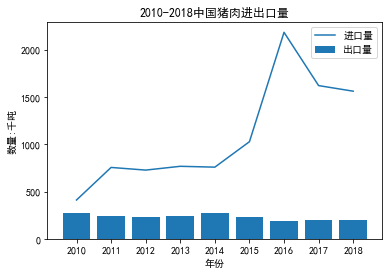

In [51]:
plt.bar(ex_10_18.index,ex_10_18.values,label='出口量')
plt.plot(im_10_18.index,im_10_18.values,label='进口量')
plt.title('2010-2018中国猪肉进出口量')
plt.xlabel('年份')
plt.ylabel('数量:千吨')
plt.legend()
plt.savefig('2010-2018中国猪肉进出口量.jpg')

#### 4.中国年人均肉类消费量

In [52]:
meat_year = pd.DataFrame([[19.8,20.0,20.1,19.6,20.1],[1.5,1.5,1.6,1.8,1.9],[0.9,1.0,1.2,1.5,1.3],[7.2,8.0,8.4,9.1,8.9]],
                         index=['猪肉','牛肉','羊肉','禽类'],
                        columns=['2013','2014','2015','2016','2017'])
meat_year

,2013,2014,2015,2016,2017
猪肉,19.8,20.0,20.1,19.6,20.1
牛肉,1.5,1.5,1.6,1.8,1.9
羊肉,0.9,1.0,1.2,1.5,1.3
禽类,7.2,8.0,8.4,9.1,8.9


In [53]:
from pyecharts.charts import Bar
bar = Bar()
bar.add_xaxis(meat_year.columns.tolist())
bar.add_yaxis('猪肉',meat_year.iloc[0,:].tolist())
bar.add_yaxis('牛肉',meat_year.iloc[1,:].tolist())
bar.add_yaxis('羊肉',meat_year.iloc[2,:].tolist())
bar.add_yaxis('禽类',meat_year.iloc[3,:].tolist())
bar.set_global_opts(title_opts=opts.TitleOpts(title="2017全国人均肉类消费量"),
                   toolbox_opts=opts.ToolboxOpts(is_show=True))
bar.render_notebook()

#### 供应减少

#### 1.今年生猪存栏量与屠宰量

In [54]:
# 读入存栏量数据（农业农村部）
livestock_pork = pd.read_excel('E:/datas/2019年1-10月生猪存栏量.xlsx',encoding='utf-8')
livestock_pork

,月份,生猪存栏(同比),生猪存栏(环比),能繁母猪存栏(同比),能繁母猪存栏(环比)
0,2019-1,-5.7,-12.62,-3.56,-14.75
1,2019-2,-5.4,-16.60,-5.00,-19.10
2,2019-3,-1.2,-18.80,-2.30,-21.00
3,2019-4,-2.9,-20.80,-2.50,-22.30
4,2019-5,-4.2,-22.90,-4.10,-23.90
5,2019-6,-5.1,-25.80,-5.00,-26.70
6,2019-7,-9.4,-32.20,-8.90,-31.90
7,2019-8,-9.8,-38.70,-9.10,-37.40
8,2019-9,-3.0,-41.10,-2.80,-38.90
9,2019-10,-0.6,-41.40,0.60,-37.80


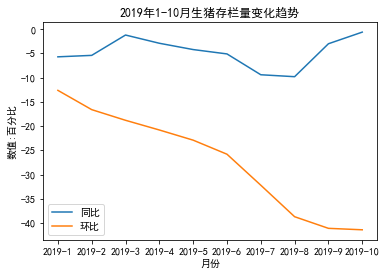

In [55]:
plt.rcParams['axes.unicode_minus']=False
plt.plot(livestock_pork['月份'],livestock_pork['生猪存栏(同比)'],label='同比')
plt.plot(livestock_pork['月份'],livestock_pork['生猪存栏(环比)'],label='环比')
plt.xlabel('月份')
plt.ylabel('数值:百分比')
plt.title('2019年1-10月生猪存栏量变化趋势')
plt.legend()
plt.savefig('2019年1-10月生猪存栏量变化趋势.jpg')

In [56]:
# 仅仅存栏量少可能说明不了说明问题，也可能是屠宰量大了，那么我们再来看看屠宰量
# 读入屠宰量数据（农业农村部）
slaughter_pork = pd.read_excel('E:/datas/2019年1-10月生猪屠宰量.xlsx',encoding='utf-8')
slaughter_pork

,日期,屠宰量,环比,同比
0,2019-1,2434.01,0.0637,0.0333
1,2019-2,1292.88,-0.4688,-0.2605
2,2019-3,1855.72,0.4353,-0.0320
3,2019-4,1840.63,-0.0081,-0.1302
4,2019-5,1915.35,0.0406,-0.1034
5,2019-6,1758.24,-0.0820,-0.1019
6,2019-7,1730.34,-0.0159,-0.1133
7,2019-8,1463.36,-0.1543,-0.2560
8,2019-9,1233.72,-0.1569,-0.3584
9,2019-10,1053.10,-0.1464,-0.4602


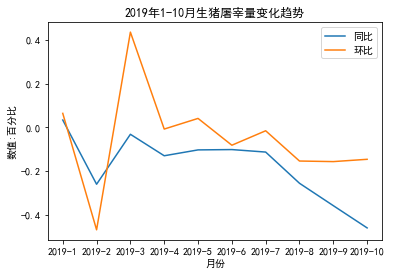

In [57]:
plt.plot(slaughter_pork['日期'],slaughter_pork['同比'],label='同比')
plt.plot(slaughter_pork['日期'],slaughter_pork['环比'],label='环比')
plt.xlabel('月份')
plt.ylabel('数值:百分比')
plt.title('2019年1-10月生猪屠宰量变化趋势')
plt.legend()
plt.savefig('2019年1-10月生猪屠宰量变化趋势.jpg')

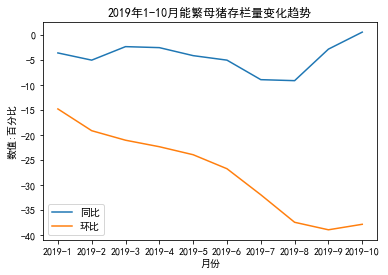

In [58]:
# 同样还有一个值得关注的问题是，今年来母猪存栏量一直在减少
plt.rcParams['axes.unicode_minus']=False
plt.plot(livestock_pork['月份'],livestock_pork['能繁母猪存栏(同比)'],label='同比')
plt.plot(livestock_pork['月份'],livestock_pork['能繁母猪存栏(环比)'],label='环比')
plt.xlabel('月份')
plt.ylabel('数值:百分比')
plt.title('2019年1-10月能繁母猪存栏量变化趋势')
plt.legend()
plt.savefig('2019年1-10月能繁母猪存栏量变化趋势.jpg')

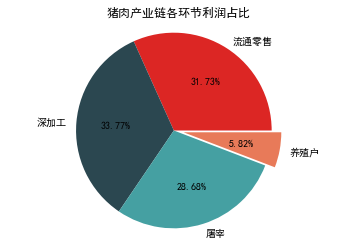

In [59]:
# 有研究显示生产1KG火腿其毛利率在整个产业链分布为 养殖户0.4元-屠宰1.97元-深加工2.32元-流通零售2.18元
labels = ['流通零售','深加工','屠宰','养殖户']
datas = [2.18,2.32,1.97,0.4]
colors = ['#dc2624','#2b4750','#45a0a2','#e87a59']
explode = [0,0,0,0.1]
plt.pie(datas,labels=labels,explode=explode,colors=colors,autopct='%1.2f%%')
plt.axis('equal')
plt.title('猪肉产业链各环节利润占比')
plt.savefig('猪肉产业链各环节利润占比.jpg')